### 概率模型的参数
概率论中用来逼近一个真实数据分布的基础数据分布有很多，最基础的有均匀分布，指数分布和正态分布。这个的基础性和初等函数相当，那么现在我们有了数据集$X=\{x_1,x_2,...,x_n\}$和概率分布$P(x|\theta)$，如何从数据集中推理出最合适的参数呢?  
比如对一个离散事件，如果我们投掷1000次硬币，700次为正300次为反，我们就会认为这个离散的概率分布满足P(x=1) = 0.7，P(x=0) = 0.3，这个过程其实就是由统计数据得到的离散概率分布的参数值的过程。如果是连续的概率分布，我们可以优化一个连续的目标函数。事实上我们要优化的目标函数是
$$ \hat L = P(x_1|\theta)P(x_2|\theta)...P(x_n|\theta) $$
概率连乘可能造成浮点数精度下溢，我们一般会转换它为对数形式处理
$$ L = log\hat L = log(P(x_1|\theta)P(x_2|\theta)...P(x_n|\theta)) $$
我们的目的就是最大化这个对数似然函数
$$ maximize_{\theta}\quad L $$
我们把上面的投硬币事件写出对数似然函数
$$ L(\theta) = log(p^{700}(1-p)^{300}) = 700log(p)+300log(1-p) $$
我们计算它对theta的导数，并让它等于0就得到目标参数满足的等式
$$ \frac{dL}{d\theta} = \frac{700}{p}+\frac{300}{p-1} = 0 $$
$$ 700(p-1)+300p = 0\rightarrow 1000p = 700\rightarrow p = 0.7 $$

### 正态分布
也叫高斯分布，是我们最常用于逼近数据分布的基本分布，一维的高斯分布写做
$$ P(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
我们同样写出它的对数似然函数，并最大化它寻找最优参数
$$ L = -Nlog(\sqrt{2\pi})-Nlog(\sigma)-\sum_i^N \frac{(x_i-\mu)^2} {2\sigma^2}$$
求偏导等于0
$$ \frac{\partial L} {\partial\mu} = -\sum_i^N \frac{(x_i-\mu)} {\sigma^2} = 0 $$
$$ \mu = \frac{\sum_i^N x_i} {N} $$
$$ \frac{\partial L} {\partial \sigma} = -\frac{N}{\sigma}+\sum_i^N \frac{2(x_i-\mu)^2} {\sigma^3} = 0 $$
$$ \sigma^2 = \frac{\sum_i^N(x_i-\mu)^2} {N} $$

### EM算法
上面的例子都比较简单，写出似然函数就能直接计算出参数的解析解。但有些时候模型会比上面的复杂得多，概率模型计算概率时不但受模型参数影响，也受隐变量影响，即对第i个样本计算概率时是$P(x_i,z_i|\theta)$，其中$z$是隐变量。一旦参数变多，尤其是有隐变量存在时，上面的直接计算似然偏导的方法就很不可行。在优化$\theta$时，我们的目标函数需要是$P(x|\theta)=\sum_{z_i}P(x_i,z_i|\theta)$。因为$z$和$\theta$一般会出现在同一个式子中，以乘积或嵌套函数的形式形成高度非线性的方程组。这时我们需要求解非线性方程组的解，难度极大。我们这时会使用迭代解法来帮助求解，为了不让z影响计算，我们把x的边缘概率来化简
$$ \sum_i^mlogP(x_i|\theta)=\sum_i^mlog\sum_{z_i}P(x_i,z_i|\theta)=\sum_i^mlog\sum_{z_i}Q_i(z_i)\frac{P(x_i,z_i|\theta)}{Q_i(z_i)}\ge \quad\sum_i^m\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i|\theta)}{Q_i(z_i)}$$
不等式那一步是Jensen不等式，期望的对数大于等于对数的期望。同时我们引入了z的分布Q，借助上式，我们就不必直接优化边缘概率，而可以优化边缘概率的下界。这个Q是什么呢?Jensen不等式的等号成立条件是，随机变量为常数，即
$$ \frac{P(x_i,z_i|\theta)} {Q_i(x_i)} = c \rightarrow P(x_i,z_i|\theta) = cQ_i(x_i)$$
又因为两者都是关于z的分布，有$$ c = \frac{\sum_z P(x_i,z_i|\theta)}{\sum_z Q_i(x_i)}  = \sum_z P(x_i,z_i|\theta) $$
$$Q_i(z_i) = \frac{P(x_i,z_i|\theta)} {\sum_z P(x_i,z_i|\theta)} = P(z_i|x_i,\theta) $$
Q可以被给出是已知样本和模型参数下的隐变量分布。它在离散z值域和给定的模型参数和样本下可以写做常数。然后我们把这个Q代入目标函数的下界，就得到$$ argmax_\theta \sum_i^m\sum_{z_i}Q_i(z_i)logP(x_i,z_i|\theta) $$
上面的整套过程，就是EM算法。当我们遇到不容易计算的最大似然问题，都可以用EM算法进行迭代求解。首先我们随机初始化一组z和theta，然后  
E step: 计算条件概率期望Q
$$Q_i(z_i) = P(z_i|x_i,\theta) $$
M step: 极大化
$$ \theta = argmax_\theta \sum_i^m\sum_{z_i}Q_i(z_i)logP(x_i,z_i|\theta) $$
重复EM步骤直到收敛。

### 应用:估计双高斯分布的参数
现在我们得到了一个学校的学生的身高分布，但是这个分布是双峰的，因为男生和女生的身高是不同的两个正态分布。现在我们希望从这个数据中推导出两个正态分布的参数。  
首先，两个一维高斯分布的混合，为了满足概率密度函数的归一化条件，它们要乘以一个常数权重。$$ P(x_i|\theta) = \alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2) $$
对数似然
$$ L = \sum_i^nlogP(x_i|\theta) = \sum_i^nlog(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)) $$
我们对5个参数计算偏导，有
$$ \frac{\partial L} {\partial \mu_1} = \sum_i^N \frac{\alpha N(x_i|\mu_1,\sigma_1)(x_i-\mu_1)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)} = 0 $$
$$ \frac{\partial L} {\partial \mu_2} = \sum_i^N \frac{(1-\alpha) N(x_i|\mu_2,\sigma_2)(x_i-\mu_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)} = 0 $$
$$ \frac{\partial L} {\partial \sigma_1} = \sum_i^N(-\frac{1}{\sqrt{2\pi}\sigma_1^2}+\frac{(x_i-\mu_1)^2}{\sqrt{2\pi}\sigma_1^4})(\frac{\alpha N(x_i|\mu_1,\sigma_1)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)})=0$$
$$ \frac{\partial L} {\partial \sigma_2} = \sum_i^N(-\frac{1}{\sqrt{2\pi}\sigma_2^2}+\frac{(x_i-\mu_2)^2}{\sqrt{2\pi}\sigma_2^4})(\frac{(1-\alpha)N(x_i|\mu_2,\sigma_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)})=0$$
$$ \frac{\partial L} {\partial \alpha} = \sum_i^N\frac{N(x_i|\mu_1,\sigma_1)-N(x_i|\mu_2,\sigma_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)}=0 $$

第五个式子可以做一些变形
$$ \sum_i^N\frac{\alpha N(x_i|\mu_1,\sigma_1)-\alpha N(x_i|\mu_2,\sigma_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)} = 0 $$
$$ \sum_i^N\frac{\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha) N(x_i|\mu_2,\sigma_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)}=\sum_i^N\frac{N(x_i|\mu_2,\sigma_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)} = N $$
可以看见上面的式子中都牵涉了一项$\frac{(1-\alpha)N(x_i|\mu_2,\sigma_2)}{(\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)}$，我们把它当作隐变量处理，就能用EM算法处理这个问题。  
E步
$$ Q_1(z_i) = \frac{\alpha N(x_i|\mu_1,\sigma_1)}{\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)} $$
$$ Q_2(z_i) = \frac{(1-\alpha)N(x_i|\mu_2,\sigma_2)}{\alpha N(x_i|\mu_1,\sigma_1)+(1-\alpha)N(x_i|\mu_2,\sigma_2)} $$
M步  
$$ \mu_1 = \frac{\sum_i^N Q_1(z_i)x_i}{\sum_i^N Q_1(z_i)} $$
$$ \mu_2 = \frac{\sum_i^N Q_2(z_i)x_i}{\sum_i^N Q_2(z_i)} $$
$$ \sigma_1^2 = \frac{\sum_i^NQ_1(z_i)(x_i-\mu_1)^2}{\sum_i^NQ_1}$$
$$ \sigma_2^2 = \frac{\sum_i^NQ_2(z_i)(x_i-\mu_2)^2}{\sum_i^NQ_2}$$
$$ \alpha = \frac{\sum_i^N Q_1(z_i)}{N} $$
迭代进行就能同时估计出两个高斯分布的均值方差和alpha权值。

In [1]:
import numpy as np

boys = np.random.randn(60)*3+172
girls = np.random.randn(40)*3+158

In [2]:
X = np.concatenate((boys,girls))
np.random.shuffle(X)

In [3]:
import scipy.stats as stats

# 初始迭代点
alpha = 0.5
means = np.array([140.,180.])
variances = np.array([1.,1.])
Q = np.zeros((2,100))


# 按照上面的公式执行EM算法
for iter in range(10):
    # E步:计算Q值
    probs0 = stats.norm.pdf(X,loc=means[0],scale=variances[0]**0.5)
    probs1 = stats.norm.pdf(X,loc=means[1],scale=variances[1]**0.5)
    Q[0] = alpha*probs0/(alpha*probs0+(1-alpha)*probs1)
    Q[1] = (1-alpha)*probs1/(alpha*probs0+(1-alpha)*probs1)
    # M步:更新alpha,means和variance
    means[0] = (Q[0]*X).sum()/Q[0].sum()
    means[1] = (Q[1]*X).sum()/Q[1].sum()
    variances[0] = (Q[0]*(X-means[0])**2).sum()/Q[0].sum()
    variances[1] = (Q[1]*(X-means[1])**2).sum()/Q[1].sum()
    alpha = Q[0].sum()/len(X)

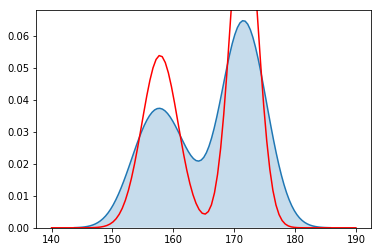

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(X,shade=True)
xx = np.linspace(140,190,100)
plt.plot(xx,alpha*stats.norm.pdf(xx,loc=means[0],scale=variances[0]**0.5)+\
        (1-alpha)*stats.norm.pdf(xx,loc=means[1],scale=variances[1]**0.5),c='r')
plt.show()